# Task.9.4. Hough transformation for real object
---
***Author: Piotr Skalski***

## 1. Imports

In [49]:
import numpy as np
import cv2
import os
import pprint
from tqdm import tqdm
from skimage.morphology import reconstruction

import display_util

import matplotlib.pyplot as plt
%matplotlib inline

## 2. Primary settings

In [75]:
SOURCE_DIR = "./../data/"
IMAGE_NAME = "lab112.png"

## 3. Loading images

In [76]:
# building path to file
image_path = os.path.join(SOURCE_DIR, IMAGE_NAME)
# loading files
image = cv2.imread(image_path, 0)

### 3.1 Data overview

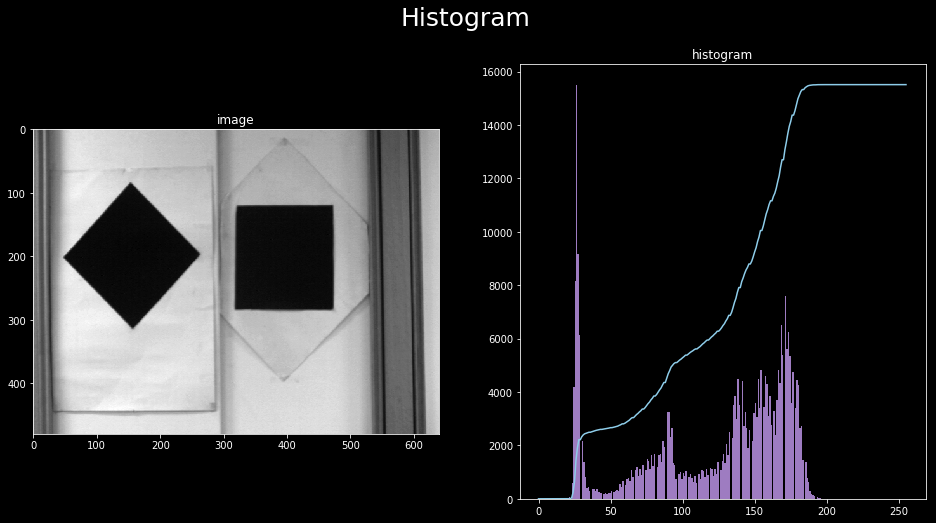

In [77]:
# creation of a cumulative histogram
hist,bins = np.histogram(image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_base = cdf * hist.max()/ cdf.max()

plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
fig.suptitle('Histogram', fontsize = 25)
ax1 = fig.add_subplot(121)
ax1.imshow(image, 'gray')
ax1.set_title("image")

ax2 = fig.add_subplot(122)
ax2.hist(image.ravel(), 256, [0,256], color = '#9E7CC1')
ax2.plot(cdf_base, color = '#8ECDEA')
ax2.set_title("histogram")

plt.show()

In [78]:
THRESH_HOLD_DOWN = 0
THRESH_HOLD_UP = 100
IMAGE = np.copy(image)

image_binarization = (IMAGE > THRESH_HOLD_DOWN) & (IMAGE < THRESH_HOLD_UP)
image_binarization = image_binarization.astype(int) * 255

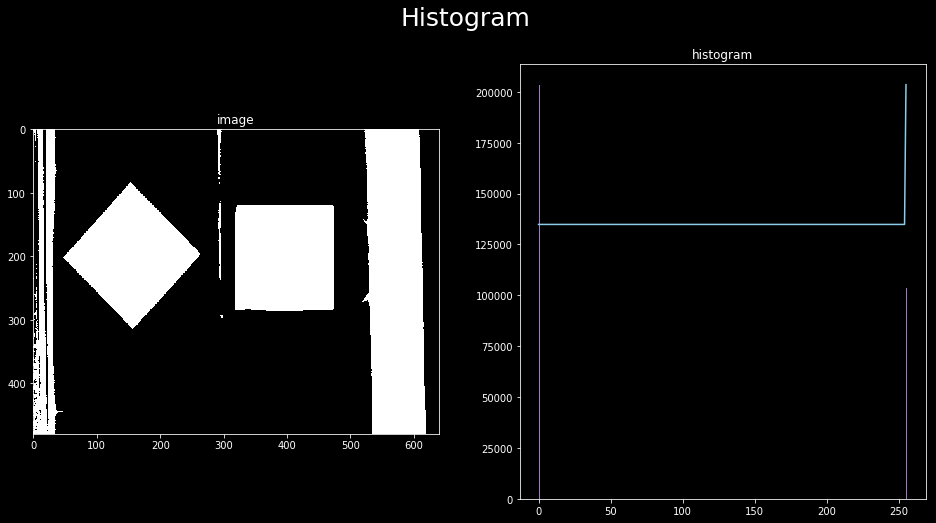

In [79]:
# creation of a cumulative histogram
hist,bins = np.histogram(image_binarization.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_base = cdf * hist.max()/ cdf.max()

plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
fig.suptitle('Histogram', fontsize = 25)
ax1 = fig.add_subplot(121)
ax1.imshow(image_binarization, 'gray')
ax1.set_title("image")

ax2 = fig.add_subplot(122)
ax2.hist(image_binarization.ravel(), 256, [0,256], color = '#9E7CC1')
ax2.plot(cdf_base, color = '#8ECDEA')
ax2.set_title("histogram")

plt.show()

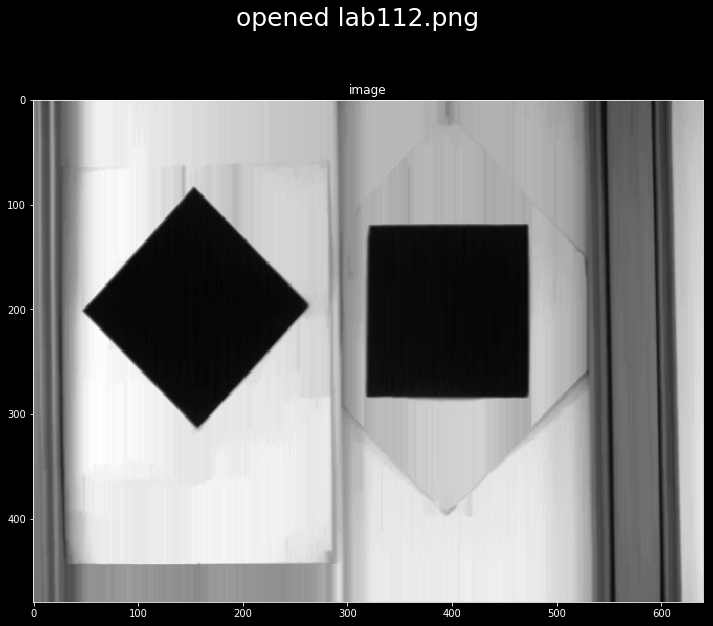

In [80]:
KERNEL_SHAPE = (1, 71)
IMAGE = np.copy(image)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, KERNEL_SHAPE)
image_open = cv2.morphologyEx(IMAGE, cv2.MORPH_OPEN, kernel)

display_util.image(image_open, "opened " + IMAGE_NAME, size=(12, 10))

1


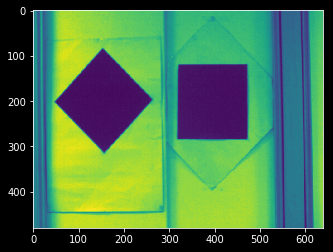

In [86]:
gray = IMAGE
img = IMAGE
edges = cv2.Canny(gray,0,150)
minLineLength = 600
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    print(1)
    cv2.line(img,(x1,y1),(x2,y2),0)

plt.imshow(image)

In [82]:
IMAGE.shape

(480, 640)

In [118]:
import cv2
import numpy as np

img = cv2.imread(image_path)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,110)

lines = cv2.HoughLines(edges,20,0.1*np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('houghlines3.jpg',img)

True

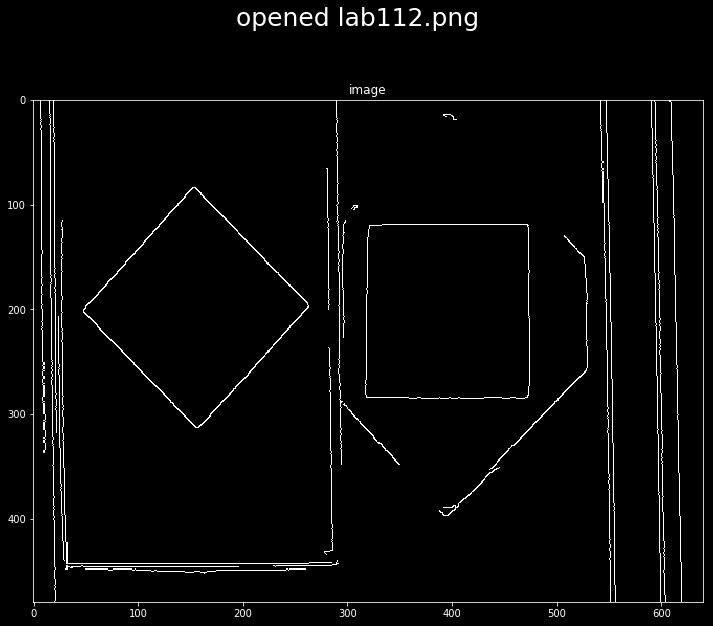

In [115]:
display_util.image(edges, "opened " + IMAGE_NAME, size=(12, 10))